# Software Coaching for Python
# Week 5: Document Clustering & Topic Modeling

Instructor: Kang-Pyo Lee 

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
path = "/content/gdrive/Shareddrives/Software_Coaching_Fall_2021"
my_folder = "HLP"     # *** REPLACE WITH YOUR FOLDER NAME ***
outcome_folder = f"{path}/{my_folder}/outcome"
classdata_folder = f"{path}/classdata"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Install packages

In [2]:
! pip install --user scikit-learn==1.0.1 pyldavis

## What Is a Corpus?

A corpus or text corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

Text Corpus: https://en.wikipedia.org/wiki/Text_corpus

In [3]:
corpus = ['This is the first document.',
          'This document is the second document.',
          'And this is the third one.',
          'Is this the first document?']

This corpus contains four documents and nine unique words, or terms. 

## What Is a Document-Term Matrix?

A document-term matrix (DTM) is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms. There are various schemes for determining the value that each entry in the matrix should take.

Document-term matrix: https://en.wikipedia.org/wiki/Document-term_matrix

DTM is based on the "Bag-of-Words" model, where a text is simply represented as the bag of its words, disregarding grammar and even word order but only keeping multiplicity. 
- Pros: Simple and easy to analyze.
- Cons: Grammar and order are lost.

Bag-of-words model: https://en.wikipedia.org/wiki/Bag-of-words_model

## What Is TF-IDF?

Term frequency (TF) is the number of times a term occurs in a document. Adjustments are often made to simple term frequency in the case where the lengh of documents varies greatly. In that case, we typically divide the raw term frequencies by the length of the document, i.e., the number of all terms in the document. 

Inverse document frequency (IDF) is an inverse function of the number of documents in which it occurs. For example, because the term *the* is so common in English, term frequency will tend to incorrectly emphasize documents which happen to use the word *the* more frequently, without giving enough weight to the more meaningful terms. Here, the term *the* is not a good keyword to distinguish relevant and non-relevant documents and terms. Hence, an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

The TF-IDF is the product of two statistics, term frequency and inverse document frequency. There are various ways for determining the exact values of both statistics.

tf–idf: https://en.wikipedia.org/wiki/Tf%E2%80%93idf

## Building a DTM with Term Frequencies

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
vectorizer = TfidfVectorizer(use_idf=False, norm=None)
vectorizer

TfidfVectorizer(norm=None, use_idf=False)

sklearn.feature_extraction.text.TfidfVectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

- `lowercase` (bool, default=True): Convert all characters to lowercase before tokenizing.

In [6]:
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

sklearn.feature_extraction.text.TfidfVectorizer.fit_transform: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.fit_transform

From this point on, you can consider X the document-term matrix for `corpus`. 

In [7]:
type(X)

scipy.sparse.csr.csr_matrix

In [8]:
X.shape

(4, 9)

X has four rows, or documents, and nine columns, or terms.

In [9]:
vectorizer.get_feature_names()

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer.get_feature_names

In [10]:
X.toarray()

array([[0., 1., 1., 1., 0., 0., 1., 0., 1.],
       [0., 2., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 1., 1., 1.],
       [0., 1., 1., 1., 0., 0., 1., 0., 1.]])

In [11]:
import pandas as pd

pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,is,one,second,the,third,this
doc0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
doc1,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
doc2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
doc3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [12]:
corpus

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

This document-term matrix is based on the bag-of-words model, so we have lost all the grammar and order of words. Only how many times each term occurs matters in this scheme.  

## Building a DTM with Binary Term Frequencies

In [13]:
vectorizer = TfidfVectorizer(binary=True, use_idf=False, norm=None)
X = vectorizer.fit_transform(corpus)

- `binary` (bool, default=False): If True, all non-zero term counts are set to 1.

In [14]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,is,one,second,the,third,this
doc0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
doc1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
doc2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
doc3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


Whether or not each word appears in a document only matters, no matter how many times it appears.

## Building a DTM with Normalized Term Frequencies

It would be unfair to give more credit to longer documents with more terms. Normalization is used to get rid of the advantage of longer documents with possibly more terms. 

In [15]:
vectorizer = TfidfVectorizer(use_idf=False, norm="l2")
X = vectorizer.fit_transform(corpus)

- `norm` ('l1', 'l2' or None, optional, default='l2') 
    - 'l2': Sum of squares of vector elements is 1
    - 'l1': Sum of absolute values of vector elements is 1

In [16]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,is,one,second,the,third,this
doc0,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.447214
doc1,0.000000,0.707107,0.000000,0.353553,0.000000,0.353553,0.353553,0.000000,0.353553
doc2,0.408248,0.000000,0.000000,0.408248,0.408248,0.000000,0.408248,0.408248,0.408248
doc3,0.000000,0.447214,0.447214,0.447214,0.000000,0.000000,0.447214,0.000000,0.447214


## Building a DTM with TF-IDF

In [17]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2")
X = vectorizer.fit_transform(corpus)

- `use_idf` (bool, default=True): Enable inverse-document-frequency reweighting.

In [18]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,document,first,is,one,second,the,third,this
doc0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
doc1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
doc2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
doc3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## Building a DTM with TF-IDF Removing English Stopwords

You may want no stopwords in English to be included in the DTM. 

In [19]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english")
X = vectorizer.fit_transform(corpus)

- `stop_words` (str {'english'}, list, or None, default=None)

In [20]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,document,second
doc0,1.000000,0.000000
doc1,0.787223,0.616668
doc2,0.000000,0.000000
doc3,1.000000,0.000000


By removing English stopwords, the terms <i>and</i>, <i>first</i>, <i>is</i>, <i>one</i>, <i>the</i>, <i>third</i>, and <i>this</i> have disappeared in the DTM. 

## Building a DTM with TF-IDF Removing Corpus-Specific Stopwords

While there are universal stopwords, there could be corpus-specific stopwords, which occur many times in a specific corpus. 

In [21]:
vectorizer = TfidfVectorizer(use_idf=True, norm="l2", max_df=0.7) 
# 어떤 단어가 전체 70%이상의 document에 존재하면 제거(10개 중 7개 존재하면 stopwords로 취급-> 효율적)
X = vectorizer.fit_transform(corpus)

- `max_df` (float in range [0.0, 1.0] or int, default=1.0): When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold. For example, if `max_df` is set to 0.7, all terms that appear in over 70% of the documents will be excluded.  

In [22]:
pd.DataFrame(data=X.toarray(), columns=vectorizer.get_feature_names(), 
             index=["doc{}".format(i) for i in range(X.shape[0])])

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,and,first,one,second,third
doc0,0.00000,1.0,0.00000,0.0,0.00000
doc1,0.00000,0.0,0.00000,1.0,0.00000
doc2,0.57735,0.0,0.57735,0.0,0.57735
doc3,0.00000,1.0,0.00000,0.0,0.00000


By removing corpus-specific stopwords, the terms <i>document</i>, <i>is</i>, <i>the</i>, and <i>this</i> have disappeared in the DTM. 

#### The choice of which scheme to fill the document-term matrix depends on the data. 

## Loading Data

In [23]:
import pandas as pd
pd.set_option('display.max_colwidth', 150)

df = pd.read_csv(f"{classdata_folder}/html_data.csv", sep="\t")
df

,file_name,title,author,datetime,body
0,the-red-sox-seemed-unstoppable-then-the-astros-turned-the-tables.html,The Red Sox Seemed Unstoppable. Then The Astros Turned The Tables.,Neil Paine,"Oct. 22, 2021","Just a couple of days ago, the Houston Astros were in big trouble. Luis García and José Urquidy — the starting pitchers for Games 2 and 3 of the A..."
1,who-betrayed-dunes-duke-leto.html,Who Betrayed Dune’s Duke Leto?,Zach Wissner-Gross,"Oct. 22, 2021","Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a..."
2,adam-schiff-says-theres-no-magic-button-to-push-to-protect-democracy.html,Adam Schiff Says ‘There’s No Magic Button To Push’ To Protect Democracy,NaN,"Oct. 22, 2021","In this installment of the FiveThirtyEight Politics podcast, Democratic Rep. Adam Schiff of California discusses why he thinks American democracy ..."
3,a-majority-of-republican-voters-actively-want-trump-to-run-for-president-again.html,A Majority Of Republican Voters Actively Want Trump To Run For President Again,Nathaniel Rakich,"Oct. 22, 2021","Welcome to Pollapalooza, our weekly polling roundup. By all appearances, former President Donald Trump is planning to run for president again in ..."
4,the-accs-best-playoff-hope-is-pittsburgh-yes-really.html,"The ACC’s Best Playoff Hope Is Pittsburgh. Yes, Really.",Santul Nerkar,"Oct. 21, 2021",The Atlantic Coast Conference started the 2021 college football season with reason for title-contending hope. Three ACC teams ranked in the top 15...
...,...,...,...,...,...
1300,the-challenges-of-holding-an-election-during-a-pandemic.html,The Challenges Of Holding An Election During A Pandemic,Galen Druke,"Sep. 11, 2020","In this episode of the FiveThirtyEight Politics podcast, Galen Druke speaks with Ohio Secretary of State Frank LaRose about what LaRose is doing t..."
1301,which-players-have-a-shot-at-becoming-wnba-rookie-of-the-year.html,Which Players Have A Shot At Becoming WNBA Rookie Of The Year?,Howard Megdal,"Sep. 11, 2020","Of all the WNBA awards, Rookie of the Year may have the most amorphous definition. Most Valuable Player tends to favor how well a player does at l..."
1302,the-nationals-are-running-out-of-time.html,The Nationals Are Running Out Of Time,Neil Paine,"Sep. 11, 2020","The Washington Nationals are no strangers to long-shot comeback bids. At multiple junctures in last year’s World Series run, their odds of being e..."
1303,confidence-interval-will-texas-go-blue-in-2020.html,Confidence Interval: Will Texas Go Blue In 2020?,Galen Druke,"Sep. 11, 2020","Welcome to another episode of Confidence Interval, where we make a persuasive case for a hot take … and then reveal how confident we really feel a..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1305 non-null   object
 1   title      1305 non-null   object
 2   author     1191 non-null   object
 3   datetime   1297 non-null   object
 4   body       1293 non-null   object
dtypes: object(5)
memory usage: 51.1+ KB


In [25]:
df = df.dropna(subset=["body"])
df

,file_name,title,author,datetime,body
0,the-red-sox-seemed-unstoppable-then-the-astros-turned-the-tables.html,The Red Sox Seemed Unstoppable. Then The Astros Turned The Tables.,Neil Paine,"Oct. 22, 2021","Just a couple of days ago, the Houston Astros were in big trouble. Luis García and José Urquidy — the starting pitchers for Games 2 and 3 of the A..."
1,who-betrayed-dunes-duke-leto.html,Who Betrayed Dune’s Duke Leto?,Zach Wissner-Gross,"Oct. 22, 2021","Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a..."
2,adam-schiff-says-theres-no-magic-button-to-push-to-protect-democracy.html,Adam Schiff Says ‘There’s No Magic Button To Push’ To Protect Democracy,NaN,"Oct. 22, 2021","In this installment of the FiveThirtyEight Politics podcast, Democratic Rep. Adam Schiff of California discusses why he thinks American democracy ..."
3,a-majority-of-republican-voters-actively-want-trump-to-run-for-president-again.html,A Majority Of Republican Voters Actively Want Trump To Run For President Again,Nathaniel Rakich,"Oct. 22, 2021","Welcome to Pollapalooza, our weekly polling roundup. By all appearances, former President Donald Trump is planning to run for president again in ..."
4,the-accs-best-playoff-hope-is-pittsburgh-yes-really.html,"The ACC’s Best Playoff Hope Is Pittsburgh. Yes, Really.",Santul Nerkar,"Oct. 21, 2021",The Atlantic Coast Conference started the 2021 college football season with reason for title-contending hope. Three ACC teams ranked in the top 15...
...,...,...,...,...,...
1300,the-challenges-of-holding-an-election-during-a-pandemic.html,The Challenges Of Holding An Election During A Pandemic,Galen Druke,"Sep. 11, 2020","In this episode of the FiveThirtyEight Politics podcast, Galen Druke speaks with Ohio Secretary of State Frank LaRose about what LaRose is doing t..."
1301,which-players-have-a-shot-at-becoming-wnba-rookie-of-the-year.html,Which Players Have A Shot At Becoming WNBA Rookie Of The Year?,Howard Megdal,"Sep. 11, 2020","Of all the WNBA awards, Rookie of the Year may have the most amorphous definition. Most Valuable Player tends to favor how well a player does at l..."
1302,the-nationals-are-running-out-of-time.html,The Nationals Are Running Out Of Time,Neil Paine,"Sep. 11, 2020","The Washington Nationals are no strangers to long-shot comeback bids. At multiple junctures in last year’s World Series run, their odds of being e..."
1303,confidence-interval-will-texas-go-blue-in-2020.html,Confidence Interval: Will Texas Go Blue In 2020?,Galen Druke,"Sep. 11, 2020","Welcome to another episode of Confidence Interval, where we make a persuasive case for a hot take … and then reveal how confident we really feel a..."


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1293 entries, 0 to 1304
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  1293 non-null   object
 1   title      1293 non-null   object
 2   author     1179 non-null   object
 3   datetime   1285 non-null   object
 4   body       1293 non-null   object
dtypes: object(5)
memory usage: 60.6+ KB


## Setting the Goal

Our goal is to build a <b>clustering</b> model that is able to find clusters of similar tweets. 
- Feature variables: words in webpage texts
- Records          : documents (web page)

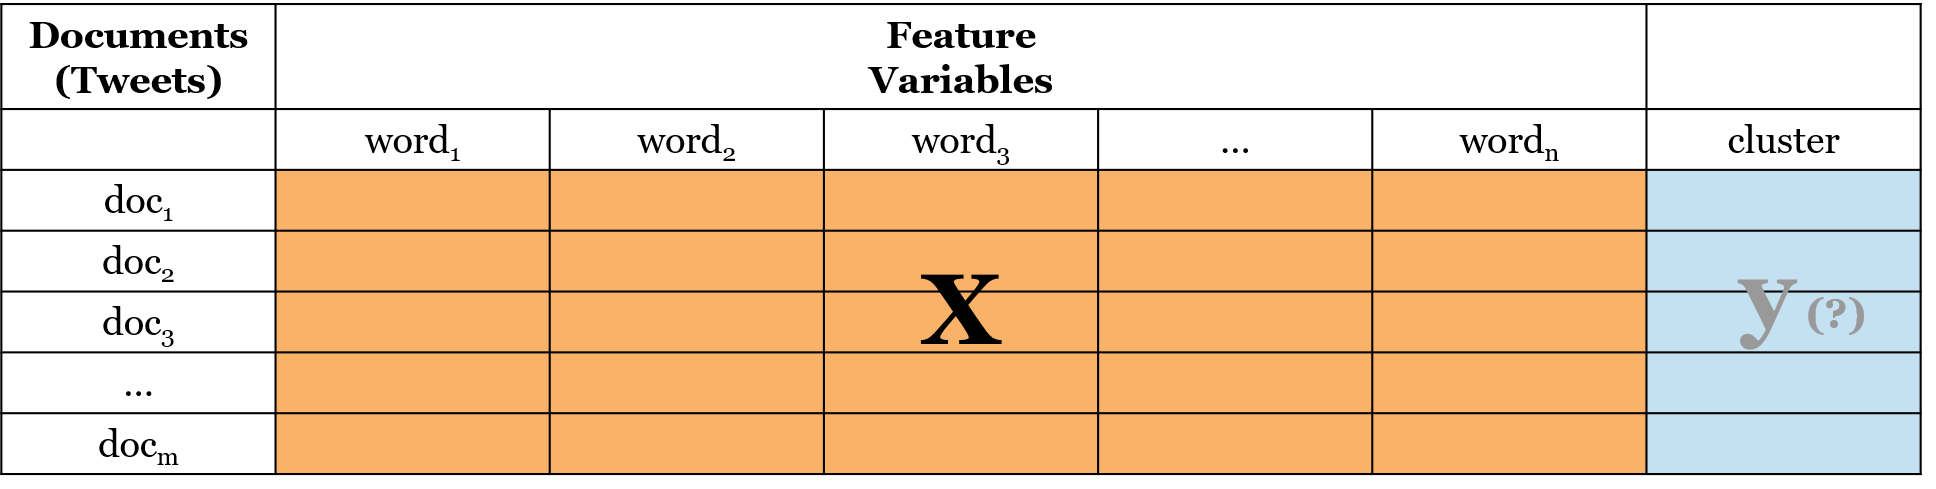

In [27]:
from IPython.display import Image

Image(f"{classdata_folder}/images/clustering.png")

## Preparing Data for Modeling

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, norm="l2", stop_words="english", max_df=0.7)
X = vectorizer.fit_transform(df.body)  


The words in the document-term matrix are used as features of the model and the documents are used as individual records of the model. Recall that there is no `y`, or the outcome variable, in unsupervised learning. Note also that we do not split the dataset into a training set and a test set in unsupervised learning.  

In [29]:
X.shape

(1293, 34903)

There are 1,293 documents, or records, and 34903 words, or features. 

## K-Means Clustering

### Step 1. Choose the number of clusters

In [30]:
k = 5

### Step 2. Initialize a model object for k-means clustering

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans

KMeans(n_clusters=5, random_state=0)

sklearn.cluster.KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Step 3. Fit the model using the input data

In [32]:
%time kmeans.fit(X)

CPU times: user 1.75 s, sys: 30.7 ms, total: 1.78 s
Wall time: 1.02 s


KMeans(n_clusters=5, random_state=0)

### Step 4. Examine the clustering outcome

The focus of this step should be on identifying the characteristics of each cluster. 

In [33]:
kmeans.cluster_centers_
# 총 5개의 센트로이드의 좌표( 하나의 좌표가 34903개(column) 의 값 가짐)

array([[0.00019136, 0.00727706, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00160639, 0.00257063, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00695612, 0.00596796, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00117916, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00789229, 0.00051637, ..., 0.00108965, 0.00108965,
        0.00200184]])

In [34]:
kmeans.cluster_centers_.shape

(5, 34903)

Each value in the `kmeans.cluster_centers_` array is the coordinates of a centroid in a multi-dimensional space with about 16,500 dimensions. 

In [35]:
kmeans.labels_

array([2, 4, 3, ..., 2, 3, 4], dtype=int32)

In [36]:
df["cluster"] = kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
df[["title","body", "cluster"]]

,title,body,cluster
0,The Red Sox Seemed Unstoppable. Then The Astros Turned The Tables.,"Just a couple of days ago, the Houston Astros were in big trouble. Luis García and José Urquidy — the starting pitchers for Games 2 and 3 of the A...",2
1,Who Betrayed Dune’s Duke Leto?,"Welcome to The Riddler. Every week, I offer up problems related to the things we hold dear around here: math, logic and probability. Two puzzles a...",4
2,Adam Schiff Says ‘There’s No Magic Button To Push’ To Protect Democracy,"In this installment of the FiveThirtyEight Politics podcast, Democratic Rep. Adam Schiff of California discusses why he thinks American democracy ...",3
3,A Majority Of Republican Voters Actively Want Trump To Run For President Again,"Welcome to Pollapalooza, our weekly polling roundup. By all appearances, former President Donald Trump is planning to run for president again in ...",0
4,"The ACC’s Best Playoff Hope Is Pittsburgh. Yes, Really.",The Atlantic Coast Conference started the 2021 college football season with reason for title-contending hope. Three ACC teams ranked in the top 15...,2
...,...,...,...
1300,The Challenges Of Holding An Election During A Pandemic,"In this episode of the FiveThirtyEight Politics podcast, Galen Druke speaks with Ohio Secretary of State Frank LaRose about what LaRose is doing t...",3
1301,Which Players Have A Shot At Becoming WNBA Rookie Of The Year?,"Of all the WNBA awards, Rookie of the Year may have the most amorphous definition. Most Valuable Player tends to favor how well a player does at l...",2
1302,The Nationals Are Running Out Of Time,"The Washington Nationals are no strangers to long-shot comeback bids. At multiple junctures in last year’s World Series run, their odds of being e...",2
1303,Confidence Interval: Will Texas Go Blue In 2020?,"Welcome to another episode of Confidence Interval, where we make a persuasive case for a hot take … and then reveal how confident we really feel a...",3


In [38]:
df.cluster.value_counts()

2    522
0    498
3    186
4     59
1     28
Name: cluster, dtype: int64

Note that k-means clustering neither names the clusters nor gives any additional information about the clusters. It just yields cluster labels in numbers. It is you to identify each cluster.  

In [39]:
cluster_1st, cluster_2nd, cluster_3rd, cluster_4th, cluster_5th = df.cluster.value_counts().index

In [40]:
df[df.cluster == cluster_1st].sample(10, random_state=0)[["title", "cluster"]]     # the largest cluster

,title,cluster
958,José Mourinho Has Tottenham At The Top Of The Table. But Are Spurs For Real?,2
1184,Jimmy Butler Started Hot. Then The Lakers Cooled Him Down.,2
183,Our 2021 NFL Projections Like The Bucs And Chiefs (Again),2
292,How We’re Projecting Each Country’s Medal Count In Tokyo,2
1097,The Dodgers Went From A Stunning Loss To The Brink Of A Championship,2
1248,Russell Wilson Is Finally Throwing Early And Often,2
879,The College Football Playoff Committee Is Answering The Wrong Question,2
362,Who’s The Real ‘Playoff P’?,2
536,What Our New Metric Can Tell Us About The Best Wide Receivers In The Draft,2
426,Mike Krzyzewski Became The GOAT By Being The Ultimate Chameleon,2


In [41]:
df[df.cluster == cluster_2nd].sample(10, random_state=0)[["title", "cluster"]]          # the second largest cluster

,title,cluster
267,The Response To The Jan. 6 Select Committee Paints A Worrying Picture Of Our Democracy,0
710,"How Marjorie Taylor Greene Won, And Why Someone Like Her Can Win Again",0
787,What Do Americans Think Of Marjorie Taylor Greene? Liz Cheney? Josh Hawley?,0
1173,Trump Doesn’t Know Why Crime Rises or Falls. Neither Does Biden. Or Any Other Politician.,0
922,Americans Overwhelmingly Want Congress To Approve Another Coronavirus Stimulus Package,0
49,Why Biden’s Approval Rating Isn’t Bouncing Back,0
870,Slightly More Americans Are Ready To Impeach Trump This Time Around,0
1271,What Ruth Bader Ginsburg’s Death Could Mean For 2020 And The Supreme Court,0
461,What Has — And Hasn’t — Changed Since George Floyd Was Murdered,0
444,What’s Happening In Arizona Is Not Really An Audit Or A Recount. It’s A Partisan Inquisition.,0


In [42]:
import nltk
nltk.download(['punkt', 'averaged_perceptron_tagger', 'stopwords'])

df["words"] = df.title.apply(lambda x: nltk.word_tokenize(x))
df["tagged_words"] = df.words.apply(lambda x: nltk.pos_tag(x))

import string
global_stopwords = nltk.corpus.stopwords.words("english") 
local_stopwords = [c for c in string.punctuation] + ['‘', '’', '—', '…']

from collections import Counter

def get_counter(dataframe, stopwords=[]):
    counter = Counter()
    
    for l in dataframe.tagged_words:
        word_set = set()

        for t in l:
            word = t[0].lower()
            tag = t[1]

            if word not in stopwords:
                word_set.add(word)
            
        counter.update(word_set)
        
    return counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
counter_max = get_counter(df[df.cluster == cluster_1st], global_stopwords+local_stopwords)
counter_max.most_common(30)

[('season', 38),
 ('teams', 28),
 ('nba', 26),
 ('college', 25),
 ('best', 24),
 ('football', 24),
 ('nfl', 21),
 ('wnba', 21),
 ('one', 21),
 ('mlb', 20),
 ('team', 19),
 ('league', 19),
 ('like', 18),
 ('playoff', 17),
 ('players', 17),
 ('year', 17),
 ('good', 17),
 ('win', 16),
 ('defense', 16),
 ('watch', 16),
 ('nhl', 15),
 ('game', 15),
 ('back', 15),
 ('could', 15),
 ('better', 14),
 ('world', 13),
 ('big', 13),
 ('olympic', 13),
 ('playoffs', 12),
 ('ever', 12)]

In [44]:
counter_min = get_counter(df[df.cluster == cluster_2nd], global_stopwords+local_stopwords)
counter_min.most_common(30)

[('trump', 70),
 ('democrats', 52),
 ('biden', 50),
 ('americans', 49),
 ('covid-19', 40),
 ('republicans', 39),
 ('election', 39),
 ('could', 36),
 ('2020', 25),
 ('court', 21),
 ('supreme', 20),
 ('gop', 20),
 ('vaccine', 19),
 ('new', 19),
 ('house', 18),
 ('white', 18),
 ('georgia', 18),
 ('america', 17),
 ('republican', 16),
 ('voting', 16),
 ('might', 16),
 ('senate', 16),
 ('want', 14),
 ('race', 14),
 ('still', 14),
 ('political', 14),
 ('polls', 14),
 ('party', 13),
 ('politics', 13),
 ('make', 13)]

## LDA Topic Modeling

## Setting the Goal

Our goal is to build a <b>topic</b> model that is able to find abstract topics in the tweets. 
- Feature variables: words in web pages
- Records          : documents (web pages)

### Step 1. Choose the number of topics

In [45]:
num_topics = 7

### Step 2. Initialize a model object for LDA topic modeling

In [46]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

lda = LDA(n_components=num_topics, random_state=0)     # LDA uses randomness to get a probability distribution
lda

LatentDirichletAllocation(n_components=7, random_state=0)

sklearn.decomposition.LatentDirichletAllocation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

### Step 3. Fit the model using the input data

In [47]:
%time lda.fit(X)

CPU times: user 4.99 s, sys: 1.46 s, total: 6.44 s
Wall time: 4.87 s


LatentDirichletAllocation(n_components=7, random_state=0)

### Step 4. Examine the output of topic modeling

In [48]:
lda.components_

array([[3.91408665, 4.06651648, 0.17331681, ..., 0.20714098, 0.20714098,
        0.2609536 ],
       [0.14285797, 0.14286005, 0.14285825, ..., 0.14285813, 0.14285813,
        0.14285785],
       [0.14285727, 0.14285733, 0.14285826, ..., 0.14285814, 0.14285814,
        0.14285785],
       ...,
       [0.14285819, 0.14285747, 0.14285826, ..., 0.14285814, 0.14285814,
        0.14285785],
       [0.14299501, 3.71539153, 0.14285762, ..., 0.14285759, 0.14285759,
        0.14286595],
       [0.14285727, 0.14285732, 0.14285825, ..., 0.14285814, 0.14285814,
        0.14285785]])

In [49]:
lda.components_.shape

(7, 34903)

In [50]:
def show_topics(model, feature_names, num_top_words):
    for topic_idx, topic_scores in enumerate(model.components_):
        print("*** Topic {}:".format(topic_idx))
        print(" + ".join(["{:.2f} * {}".format(topic_scores[i], feature_names[i]) for i in topic_scores.argsort()[::-1][:num_top_words]]))
        print()

In [51]:
show_topics(lda, vectorizer.get_feature_names(), 10)

*** Topic 0:
45.23 * season + 36.25 * team + 30.96 * game + 21.98 * teams + 20.46 * games + 20.23 * league + 19.17 * percent + 19.11 * year + 17.82 * players + 16.23 * points

*** Topic 1:
4.85 * terrence + 1.39 * mcdavid + 1.17 * ivermectin + 0.99 * teaser + 0.96 * quiz + 0.90 * alien + 0.88 * gar + 0.64 * obesity + 0.64 * br + 0.64 * gd

*** Topic 2:
0.96 * castles + 0.79 * castle + 0.70 * gorman + 0.65 * phalanxes + 0.63 * contextualizes + 0.57 * soldiers + 0.42 * warlords + 0.40 * poem + 0.32 * dorner + 0.27 * poems

*** Topic 3:
0.56 * oats + 0.53 * boushey + 0.50 * karthick + 0.50 * ramakrishnan + 0.50 * keys + 0.47 * heather + 0.46 * ida + 0.45 * barnett + 0.43 * jane + 0.42 * douglass

*** Topic 4:
0.96 * durag + 0.54 * zbořil + 0.44 * surf + 0.44 * luli + 0.44 * surfers + 0.40 * besheer + 0.40 * andra + 0.40 * holman + 0.35 * mohamed + 0.32 * gillespie

*** Topic 5:
47.54 * trump + 38.94 * biden + 33.97 * percent + 32.57 * election + 31.36 * democrats + 30.14 * republicans + 2

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Note that, just like k-means clustering, LDA topic modeling does not name the topics. It is up to you to identify each topic with its contributing words.  

### Topic Model Visualization

In [52]:
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


pyLDAvis: https://github.com/bmabey/pyLDAvis

In [53]:
pyLDAvis.sklearn.prepare(lda, X, vectorizer)

/root/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/root/.local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.057451 -0.085971       1        1  52.315944
5      0.090104  0.062503       2        1  42.080268
1     -0.030188  0.004830       3        1   1.179356
6     -0.029539  0.004691       4        1   1.127604
2     -0.029308  0.004648       5        1   1.103670
3     -0.029282  0.004664       6        1   1.098436
4     -0.029238  0.004635       7        1   1.094721, topic_info=              Term       Freq      Total Category  logprob  loglift
32156        trump  26.000000  26.000000  Default  30.0000  30.0000
4774         biden  21.000000  21.000000  Default  29.0000  29.0000
27873       season  27.000000  27.000000  Default  28.0000  28.0000
11125     election  18.000000  18.000000  Default  27.0000  27.0000
9433     democrats  17.000000  17.000000  Default  26.0000  26.0000
...            ...        ...        ...      ...      ...      ...
14937     headwear   0.004955   0.226545   Topic7 -10.4522   0.6921
17137       jarred   0.004935   0.209152   Topic7 -10.4562   0.7679
18337       lauzon   0.005021   0.394775   Topic7 -10.4388   0.1501
7570   communities   0.004979   1.128622   Topic7 -10.4473  -0.9088
19386   mainstream   0.004960   0.904078   Topic7 -10.4512  -0.6909

[337 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
131        1  0.823935     10
131        2  0.183097     10
194        1  0.843897     12
194        2  0.120557     12
962        1  0.516942   2020
...      ...       ...    ...
34174      1  0.654443    win
34174      2  0.373967    win
34618      1  0.967941  yards
34634      1  0.726679   year
34634      2  0.264247   year

[117 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 2, 7, 3, 4, 5])

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.
- Bubble size: the importance of the topics, relative to the data.